In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import time
tag= 'tmp' + str(int(time.time()))

### Courbe de taux de décharge en fonction des poids synaptiques

Une fois l'effet d'une variation du poids global $W$ observé, des tests plus spécifiques doivent être effectués. Hormis les connexions de la source au réseau, nous rappelons que le modèle comporte quatre projections. Soient E et I, la population excitatrice et inhibitrice l'ensemble des poids entre ces deux populations est : {$W_{EI}$, $W_{EE}$, $W_{IE}$, $W_{II}$}. L'effet des poids de chacune des quatre projections sur le taux de décharge des neurones du réseau est étudié. 

Pour chaque type de connexion, plusieurs simulations du modèle sont lancés avec différentes valeurs du poids synaptique des connexions de ce type. Et pour chaque simulation, le taux de décharge neuronal moyen des populations E et I est récupéré. Les résultats sont alors affichés dans une courbe de taux de décharge en fonction d'une variation de poids synaptique.

Nous remarquons que l'augmentation de $W_{EI}$ comme $W_{IE}$, le poids des connexions latérales, induit une diminution du taux de décharge en sortie du réseau. Aussi, l'augmentation de $W_{EE}$ et $W_{II}$, le poids des connexions récurrentes, provoque l'effet inverse.

In [4]:
import numpy as np
from RRNN import RRNN
n_sim_each = 20
net = RRNN(ring=False, recurrent=True)

### Results

------------  w_exc_inh  -------------


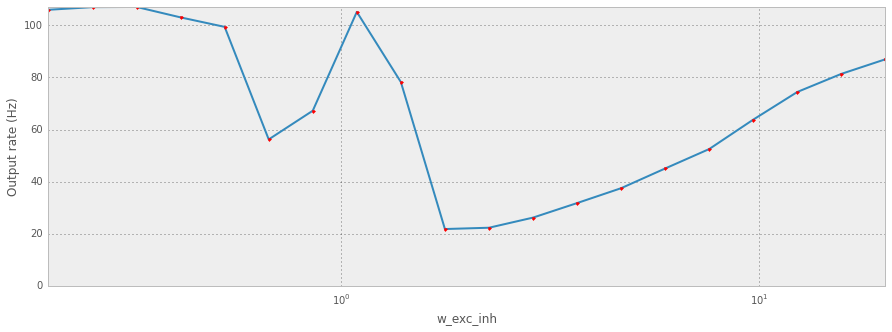

------------  w_exc_exc  -------------


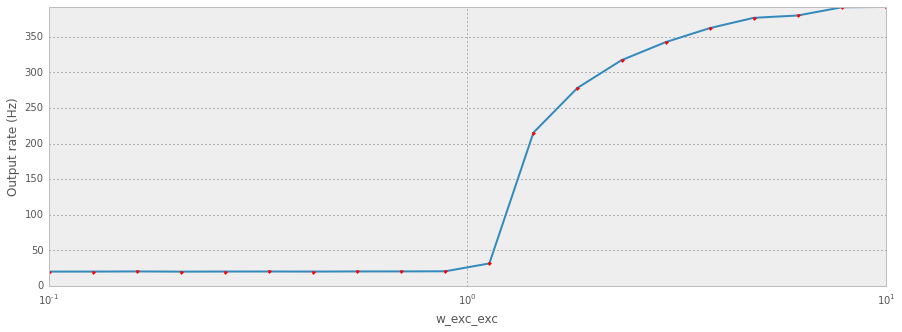

------------  w_inh_exc  -------------


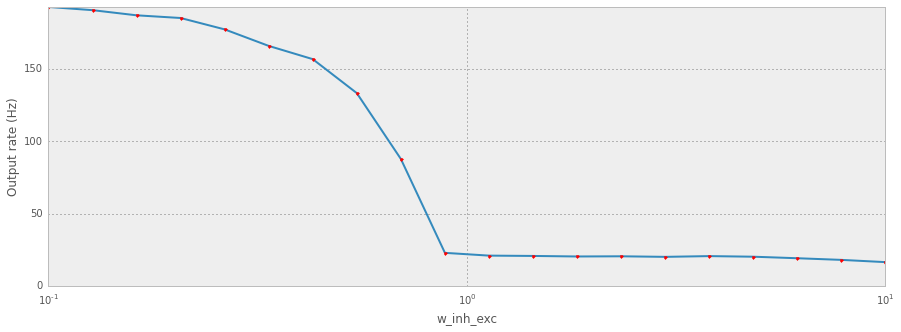

------------  w_inh_inh  -------------


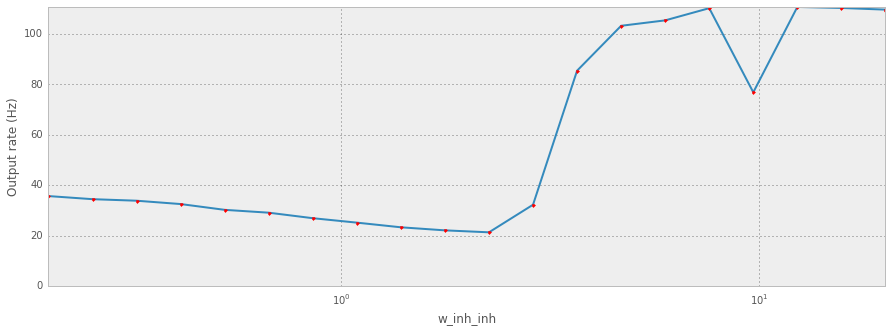

In [5]:
for zoom in [1.]:#, .3, .1]:
    sim_list = [('w_exc_inh', net.sim_params['w_exc_inh']*np.logspace(-zoom, zoom, n_sim_each)),
                ('w_exc_exc', net.sim_params['w_exc_exc']*np.logspace(-zoom, zoom, n_sim_each)),
                ('w_inh_exc', net.sim_params['w_inh_exc']*np.logspace(-zoom, zoom, n_sim_each)),
                ('w_inh_inh', net.sim_params['w_inh_inh']*np.logspace(-zoom, zoom, n_sim_each))
    ]

    net.paramRole(sim_list, f_rate_max=None, datapath='/tmp/RRNN-weights' + tag)